In [2]:
import pandas as pd

#asa vezes daa erro na importaação
#colocaar no final ecoding='ISO-8859-1'

vendas_df = pd.read_csv(r'Tratamento de Dados e Multiplas Bases\Contoso - Vendas - 2017.csv',sep=";")
produtos_df = pd.read_csv(r'Tratamento de Dados e Multiplas Bases\Contoso - Cadastro Produtos.csv',sep=';',encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Tratamento de Dados e Multiplas Bases\Contoso - Lojas.csv',sep=';',encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Tratamento de Dados e Multiplas Bases\Contoso - Clientes.csv',sep=';',encoding='ISO-8859-1')

#display(vendas_df)
#display(produtos_df)
#display(lojas_df)
#display(clientes_df)


#exluido colunas;   axis = 0 -> linhaas  axis = 1 -> colunas
#clientes_df = clientes_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)


clientes_df = clientes_df.rename(columns={'ÿID Cliente':'ID Cliente'})
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
lojas_df = lojas_df.rename(columns={'ÿID Loja':'ID Loja'})

clientes_df = clientes_df[['ID Cliente','E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja','Nome da Loja']]



# display(clientes_df)
# display(produtos_df)
# display(lojas_df)



#usando merge para juntar colunas
# dintaxe         =           datframe          coluna em comum
# novo_dataframe = dataframe1.merge(dataframe2,on='coluna)
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df,on='ID Cliente')
vendas_df = vendas_df.rename(columns={'E-mail':'E-mail do Cliente'})


display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


<Axes: xlabel='E-mail do Cliente'>

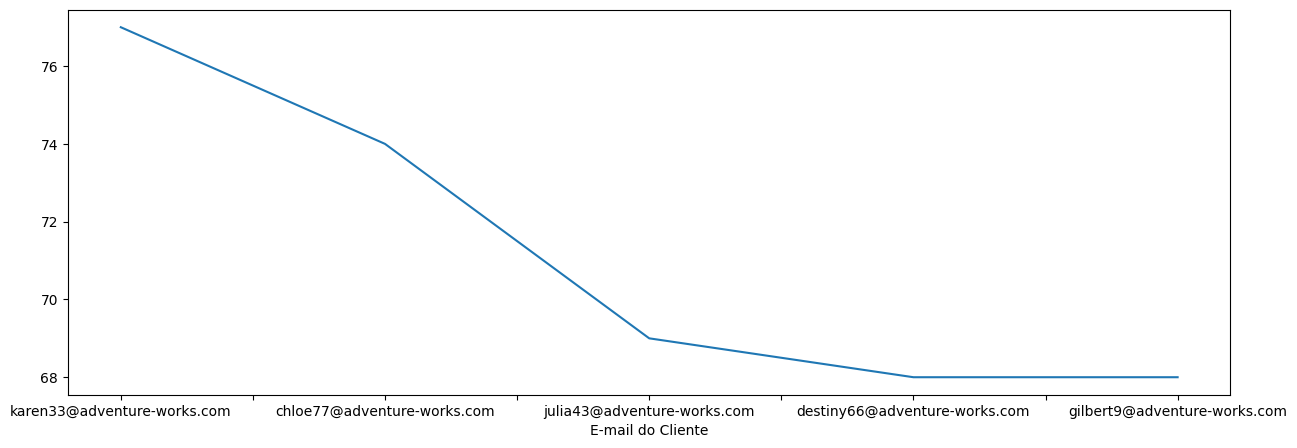

In [3]:

#value_counts() 
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
#exibir dataframe
#frequencia_clientes

#exibir grafico com os 5 primeiros clientes
#figsize para alterar a larggura e altura
frequencia_clientes[:5].plot(figsize=(15,5))



<Axes: xlabel='Nome da Loja'>

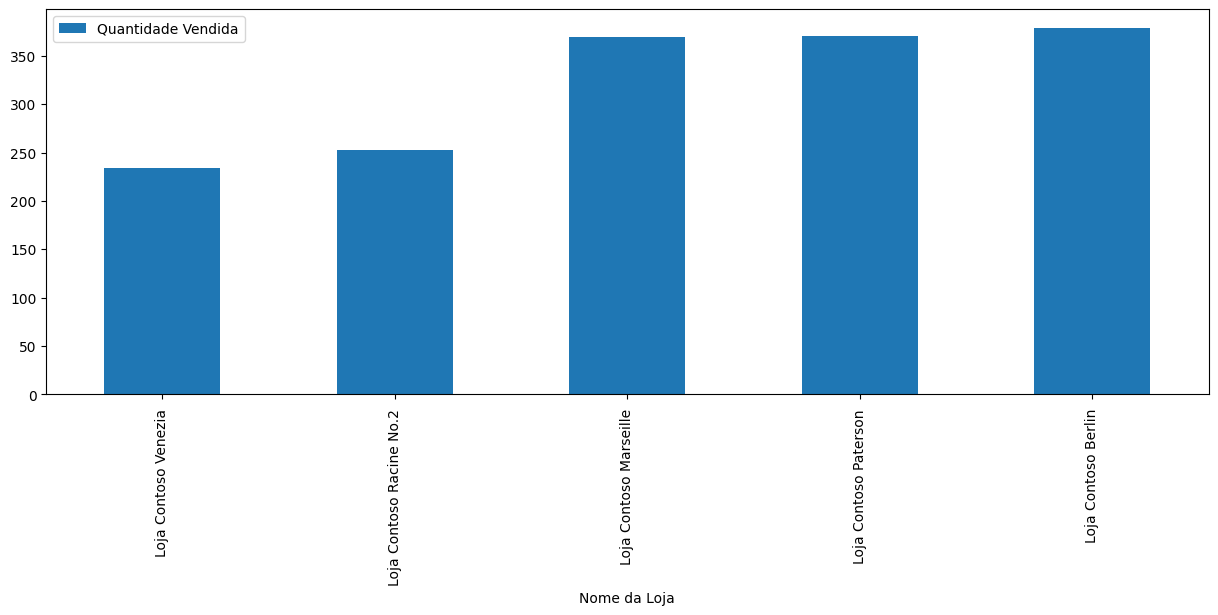

In [4]:
#GROUPBY

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
#ordenando em ordem crescente
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida')
#ordenando em ordem crescente
#vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = False)
#display(vendas_lojas)

#pegaando só os 5 primeiros elementos
vendas_lojas[:5].plot(figsize=(15,5), kind='bar')

#maior valor e seu indice
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()




In [5]:
#porcentagem de devolução por venda


qtd_vendida = vendas_df['Quantidade Vendida'].sum()
qtd_devolvida = vendas_df['Quantidade Devolvida'].sum()

print(f'{qtd_devolvida/qtd_vendida:.2%}')

1.17%


In [14]:
#filtrando só uma loja

vendas_lojaContoso = vendas_df[vendas_df['ID Loja'] == 306]
qtd_devolvidaContoso = vendas_lojaContoso['Quantidade Devolvida'].sum()
qtd_vendidaContoso = vendas_lojaContoso['Quantidade Vendida'].sum()

print(f'Porcentagem de devolução loja contoso: {qtd_devolvidaContoso/qtd_vendidaContoso:.2%}')
#display(vendas_lojaContoso)

#filtrando loja 306 sem devolução
ddf_loja306semdev = vendas_df[(vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0)]
#outra forma de fazer
# loja306 = vendas_df['ID Loja'] == 306
# lojaSemDev = vendas_df['Quantidade Devolvida'] == 0
# ddf2 = vendas_df[loja306 & lojaSemDev]


#mudando o campo data da venda 
ddf_loja306semdev['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format= '%d/%m/%Y')
#criando colunas com os campos da data da venda
ddf_loja306semdev['Ano da Venda'] = ddf_loja306semdev['Data da Venda'].dt.year
ddf_loja306semdev['Mes da Venda'] = ddf_loja306semdev['Data da Venda'].dt.month
ddf_loja306semdev['Dia da Venda'] = ddf_loja306semdev['Data da Venda'].dt.day


display(ddf_loja306semdev)



Porcentagem de devolução loja contoso: 1.33%


C:\Users\biro_\AppData\Local\Temp\ipykernel_11992\1990829631.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_loja306semdev['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format= '%d/%m/%Y')
C:\Users\biro_\AppData\Local\Temp\ipykernel_11992\1990829631.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_loja306semdev['Ano da Venda'] = ddf_loja306semdev['Data da Venda'].dt.year
C:\Users\biro_\AppData\Local\Temp\ipykernel_11992\1990829631.py:22: SettingWithCopyWarning: 
A value is t

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente,Ano da Venda,Mes da Venda,Dia da Venda
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11,23
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,8,18
18,786402,2017-10-21,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,10,21
19,383897,2017-05-25,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,5,25
77,559478,2017-07-26,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com,2017,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,2017-11-18,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com,2017,11,18
885356,907944,2017-12-04,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org,2017,12,4
885386,919123,2017-12-08,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com,2017,12,8
885390,964452,2017-12-25,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com,2017,12,25
